In [164]:
import docx
import os
import re
from CurriculumDB.Modelsn4j import *
from neo4j import GraphDatabase


In [165]:
# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "bolt://localhost:7687"
AUTH = ("curriculum", "mycurriculum")

driver = GraphDatabase.driver(URI, auth=AUTH)
print(driver)
print(driver.verify_connectivity())
#help(driver.verify_connectivity)
factory = CurriculumFactory(driver, 'curriculumdb')

None


In [ ]:
help(factory.get_or_create_Element)

In [166]:
moduledir = "C:/Users/dmamartin/OneDrive - University of Dundee/Teaching/CurriculumDB/Modules/"
#moduledir = "C:/Users/marti/Documents/LifeSciteaching/Curriculum/Modules/"

In [167]:
modules = {}
for stage in os.listdir(moduledir):
    print(f'Looking in {stage}')
    for file in os.listdir(os.path.join(moduledir, stage)):
        print(f'Checking {file}')
        if file.endswith('.docx'):
            print(f'processing {file}')
            doc=docx.Document(os.path.join(moduledir, stage, file))
            structure ={}
            for t in doc.tables:
                for r in range(len(t.rows)):
                    structure[t.row_cells(r)[0].text.split()[0]] =t.row_cells(r)[1].text
            modules[structure['1.2']]=structure

Looking in Stage 1
Checking ARCHIVE
Checking BS10001 Widening Access Programme Collective Module Specification QASv1.docx
processing BS10001 Widening Access Programme Collective Module Specification QASv1.docx
Checking BS11005 Numeracy, Chemistry and Physics for the Biological and Biomedical Sciences Spec QASv4.docx
processing BS11005 Numeracy, Chemistry and Physics for the Biological and Biomedical Sciences Spec QASv4.docx
Checking BS11006 The Poison Pen Specification QASv4.docx
processing BS11006 The Poison Pen Specification QASv4.docx
Checking BS11008 Core Skills in the Life Sciences 1A QASv3.docx
processing BS11008 Core Skills in the Life Sciences 1A QASv3.docx
Checking BS11009 The Building Blocks of Life QASv2.docx
processing BS11009 The Building Blocks of Life QASv2.docx
Checking BS12005 Science and Society Module Spec QASv4.docx
processing BS12005 Science and Society Module Spec QASv4.docx
Checking BS12008 Introduction to Scientific Enterprise Specification QASv4.docx
processing

Checking BS32708 Molecular Biophysics Module Specification QASv1.docx
processing BS32708 Molecular Biophysics Module Specification QASv1.docx
Looking in Stage 4
Checking ARCHIVE
Checking BS41004 Research Project Biological Sciences Module Specification QASv4.docx
processing BS41004 Research Project Biological Sciences Module Specification QASv4.docx
Checking BS41005 Research Project Biological Sciences Programme Specification QASv3.docx
processing BS41005 Research Project Biological Sciences Programme Specification QASv3.docx
Checking BS41006 Research Skill in Biomedical Sciences QASv5.docx
processing BS41006 Research Skill in Biomedical Sciences QASv5.docx
Checking BS41007 Research Project Biomedical Sciences Module Specification QASv6.docx
processing BS41007 Research Project Biomedical Sciences Module Specification QASv6.docx
Checking BS41009 Internship Work Placement QASv1.docx
processing BS41009 Internship Work Placement QASv1.docx
Checking BS41701 Honours Project in Life Sciences 

In [5]:
print(Module.requiredParams, Module.optionalParams)


{'code': 'Module code', 'name': 'Module name', 'credits': 'Credit weight', 'scqflevel': 'SCQF level', 'shelevel': 'SHE level', 'semester': '1, 2 or both'} {'block': 'Teaching block: C or D', 'startyear': 'First academic year', 'endyear': 'Last academic year'}


In [52]:
newmod = modules['BS32031']
modobj ={}

scqf = re.compile(r'SCQF\D+(\d+)\D+(\d+)\D')
delivery = re.compile(r'Semester (\d)')
#for m in modules:
#    print(m)
#for m in ['BS32031']:
for m in modules:
    try:
        newmod=modules[m]
    
        match=scqf.search(newmod['1.3'])
        scqflevel=0
        shelevel=0
        credits=0
        if match:
            scqflevel = int(match.group(1))
            shelevel = scqflevel - 6
            credits = int(match.group(2))
        else: 
            shelevel = int(m[2])
            scqflevel = shelevel +6
            print(m,"1.3", newmod['1.3'])
        match=delivery.search(newmod['1.14'])
        semester=0
        if match:
            semester = int(match.group(1))
        else:
            print(m,"1.14",newmod['1.14'])
            semester = int(m[3])
        if credits and scqflevel and shelevel and semester:
            newmodparams ={'code':newmod['1.2'], 'name':newmod['1.1'], 'semester':semester, 
                           'credits': credits, 'scqflevel':scqflevel, 'shelevel':shelevel}
            modobj[m]=factory.get_or_create_Element('Module', **newmodparams)
    except Exception as e:
        print(newmodparams,e)
        

BS10001 1.14 
BS11008 1.14 
BS11009 1.14 
BS12009 1.14 
BS12010 1.14 
BS21002 1.14 
BS21012 1.14 
BS30007 1.14 
BS32034 1.14 
BS41009 1.14 
BS42028 1.14 
BS51007 1.14 
BS51008 1.14 
BS51009 1.14 
BS51010 1.14 
BS51011 1.14 
BS51012 1.14  
BS52007 1.14 
BS52009 1.14 
BS52010 1.14 
BS52011 1.14 
BS52012 1.14 
BS52013 1.14 Once per academic year in semester 2
BS53003 1.14 
BS53004 1.14 
BS53005 1.14  semester 3 (summer) 
BS53006 1.14  semester 3 (summer) 
BS53007 1.14 


In [162]:
for m in modules:
    if modules[m]['1.16'].strip() and modules[m]['1.16'].strip().upper()[0]!='N':
        print(f'{m}: Prerequisites: {modules[m]["1.16"]}')
        modules[m]['Pre']=modules[m]["1.16"]
    if modules[m]['1.17'].strip() and modules[m]['1.17'].strip().upper()[0]!='N':
        print(f'{m}: Corequisites: {modules[m]["1.17"]}')
        modules[m]['Co']=modules[m]["1.17"]
    if modules[m]['1.18'].strip() and modules[m]['1.18'].strip().upper()[0]!='N':
        print(f'{m}: Antirequisites: {modules[m]["1.18"]}')
        modules[m]['Anti']=modules[m]["1.18"]
    

BS11005: Prerequisites: After completion of the skills audit prior to matriculation, a decision on whether this module is to be taken by the student will be made
BS11005: Corequisites: For students enrolled for Biological and Biomedical Sciences degrees, the following are all co-requisites:
   BS11009 (knowledge based)
   BS11008 (Lab and skills-based)

BS11008: Corequisites: For students enrolled for Biological Sciences and Biomedical Sciences degrees, the following module is a co-requisites:
• BS11009 (Knowledge based)
BS12010: Corequisites: For students enrolled for Biological Sciences and Biomedical Sciences degrees, the following modules are all co-requisites:
• BS12001 (Knowledge based)
• BS12002 (Knowledge based)
BS12701: Prerequisites: Successful completion of JPD Core curriculum to date
BS12702: Prerequisites: Successful completion of JPD Core curriculum to date
BS21001: Prerequisites: BS11001, BS11002, BS11008, BS12001, BS12002, BS12010 or Level 2 direct entry requirements

B

In [158]:
for t in doc.tables:
    for r in range(len(t.rows)):
                    print(t.row_cells(r)[0].text)

Applicability
Section 1: Module specification
Heading
1.1 Module title
1.2 Module code
1.3 Scottish Credit and Qualifications Framework (SCQF) level and credits
1.4 Aims
1.5 Indicative content
1.6 Intended learning outcomes (ILOs)
1.7 Assessment strategy
1.8 Assessment types and weighting
1.9 Teaching and learning
1.10 Indicative student contact hours and the expected amount of independent study
1.11 Teaching staff
1.12 Mode of study
1.13 Location(s) for the delivery of teaching
1.14 When delivered 
1.15 Equality and diversity
1.16 Pre-requisites or entry requirements
1.17 Co-requisites
1.18 Anti-requisites
1.19 Student numbers
Section 2: Responsibilities and contacts
Heading
2.1 Lead School
2.2 Lead discipline
2.3 Collaborating Schools (where relevant)
2.4 Module leader
2.5 Lead administrator for the module
Section 3: Module details (information for internal use for quality assurance and management)
Heading
3.1 Rationale for the module
3.2 First student intake
3.3 External organisatio

In [129]:
factory = CurriculumFactory(driver, 'curriculumdb')

In [130]:
bs32031=factory.get_or_create_Element('Module', **newmodparams)

In [131]:
bs32031

Module: [code: BS32031, name: Bioinformatics Research Skills 1, credits: 15, scqflevel: 3, shelevel: 9, semester: 2] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:0

In [48]:
[x.__name__ for x in globals()['Module'].__mro__]

['Module', 'Node', 'object']

In [ ]:
doc = docx.Document("BS32008 Plant Science Specification QASv3.docx")

In [ ]:
for p in doc.paragraphs:
    print(p.text)


In [ ]:
doc.tables[0].row_cells(0)[1].text



In [ ]:
tcount=0
structure ={}
for t in doc.tables:
    print(f'Table {tcount} ({len(t.rows)} rows)')
    tcount+=1
    for r in range(len(t.rows)):
        print(f'row {r} [{t.row_cells(r)[0].text}] [{t.row_cells(r)[1].text}])')
        structure[t.row_cells(r)[0].text.split()[0]] =t.row_cells(r)[1].text
        

In [216]:
ilos =[]
count=0
for m in modules:
    for i in modules[m]['1.6'].split('\n'):
        if i.strip():
            ilos.append([count,m,i])
            count+=1

In [189]:
def ilocompare(a, b):
    seta = set([ word for word in a[2].split() if len(word)>4])
    setb = set([ word for word in b[2].split() if len(word)>4])
    union =seta.union(setb)
    inter = seta.intersection(setb)
    if not union:
        return 1
    return 1-(len(inter)/len(union))

In [217]:
dm =[]
for y in range(len(ilos)):
    ymat=[]
    for x in range(len(ilos)):
        if x==y:
            ymat.append(0.0)
        else:
            ymat.append(ilocompare(ilos[x], ilos[y]))
    dm.append(ymat)

In [173]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster,cut_tree
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [218]:
pdm=squareform(dm)
iloh =ward(pdm)

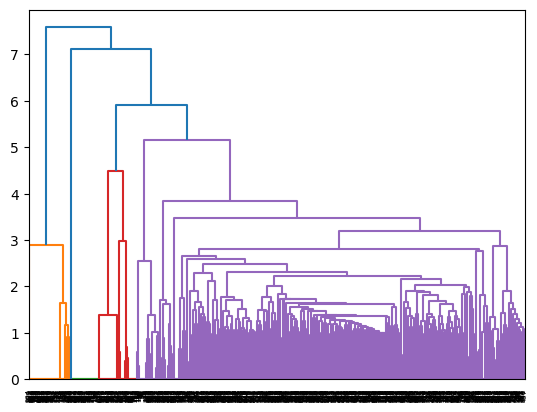

In [219]:
dendrogram(iloh)
plt.show()


In [221]:
clusters=cut_tree(iloh, height=0.8)
for p in range(len(ilos)):
    if len(ilos[p])>3:
        ilos[p][3]= int(clusters[p])
    else:
        ilos[p].append(int(clusters[p]))

In [222]:
ofh = open('moduleilos.txt','w')
print('Ref','Module','ILO', 'Cluster',file=ofh, sep='\t')
for i in ilos:
    i[2]=i[2].replace('\u2010','')
    print('\t'.join([f'{x}'.replace('\t',' ') for x in i]), file=ofh )
ofh.close()

In [223]:
groupedterms ={}
for x in ilos:
    if not groupedterms.get(x[3]):
        groupedterms[x[3]]=[]
    groupedterms[x[3]].append(x)
    


In [224]:
len(groupedterms)

429

In [225]:
len(ilos)

922